## Descripción del ejercicio:

### Este modelo ilustra una forma posible de simular la propagación de una enfermedad infecciosa. Una población comienza con un número de personas infectadas. Un infectado muere en un período determinado, con probabilidad de 0.025, o permanece infectado. El resto de la población es susceptible. Un susceptible dado tiene la probabilidad de 0.00001 de encontrar cualquier infeccioso en particular en un período determinado. Cuando ocurre tal encuentro, el encuentro hace que los susceptibles se infecten con la probabilidad de 0.1.

### El modelo simula 100 periodos. La probabilidad clave es la probabilidad de que una persona suceptible se infecte en un período determinado. 

### Como puede verificar cambiando cualquiera de las probabilidades de entrada y volviendo a ejecutar la simulación, las estadísticas de resumen son muy sensibles a estas probabilidades. Este es un buen momento para usar la herramienta de análisis de sensibilidad avanzada de @RISK, que le permite variar una o más entradas y ver cómo cambia la distribución de algunas salidas. 

In [4]:
#Importando libreria creada para el análisis del riesgo
from Libreria.simulator import *

In [5]:
# Función #1 definida por el usuario debe contener las variables de entrada del problema en cuestión. 
# Debe retornar un diccionario. 
def varibles_entrada():

    return {"Total_population":50000,
            "Initial_infectives":150,
            "P_encounter_a_particular_infective":0.00001,
            "P_infective_dies":0.025,
            "P_encounter_causes_infection":0.1}

In [6]:
# Función 2 definida por el usuario donde se recrea el comportamiento del fenomeno, usando las variables de entrada.
def infected(Total_population,Initial_infectives,P_encounter_a_particular_infective,P_infective_dies,
             P_encounter_causes_infection):

    Infectives_B=[]
    Susceptibles_B=[]
    P_susceptible_infected = []
    new_infected=[]
    deaths=[]
    infected_E=[]
    susceptibles_E=[]
    cum_deaths=[]

    for i in range(101):
        if i == 0:
            Infectives_B.append(Initial_infectives)
            Susceptibles_B.append(Total_population-Infectives_B[i])
            P_susceptible_infected.append(1-(1-P_encounter_a_particular_infective*P_encounter_causes_infection)**Infectives_B[i])
            new_infected.append(int(np.where(Susceptibles_B[i] == 0, 0, np.random.binomial(Susceptibles_B[i], P_susceptible_infected[i]))))
            deaths.append(int(np.where(Infectives_B[i] == 0, 0, np.random.binomial(Infectives_B[i], P_infective_dies))))
            infected_E.append(Infectives_B[i] + new_infected[i] - deaths[i])
            susceptibles_E.append(Susceptibles_B[i]-new_infected[i])
            cum_deaths.append(deaths[i])

        else:
            Infectives_B.append(infected_E[i-1])
            Susceptibles_B.append(susceptibles_E[i-1])
            P_susceptible_infected.append(1-(1-P_encounter_a_particular_infective*P_encounter_causes_infection)**Infectives_B[i-1])
            new_infected.append(int(np.where(Susceptibles_B[i-1] == 0, 0, np.random.binomial(Susceptibles_B[i-1], P_susceptible_infected[i-1]))))
            deaths.append(int(np.where(Infectives_B[i-1] == 0, 0, np.random.binomial(Infectives_B[i-1], P_infective_dies))))
            infected_E.append(Infectives_B[i] + new_infected[i] - deaths[i])
            susceptibles_E.append(Susceptibles_B[i]-new_infected[i])
            cum_deaths.append(deaths[i]+cum_deaths[i-1])

    Ending_percentage_infected = infected_E[-1] / Total_population
    Ending_percentage_dead = deaths[-1] / Total_population

    return {"Ending_percentage_infected": Ending_percentage_infected,"Ending_percentage_dead":Ending_percentage_dead}


In [7]:
# LLamado de la función creada para verificar que en efecto se obtengan los resultados esperados. 
infected(**varibles_entrada())

{'Ending_percentage_infected': 0.0313, 'Ending_percentage_dead': 0.00056}

In [8]:
# Se instancia la clase con los parametros necesarios para provocar el incio de la simulación.
s1=Simulator(3,2000,infected,varibles_entrada,0.95)

In [9]:
# Se ejecuta el proceso de simulación, acá solo se hace la ejecución si el usuario dese obtener los resultados
# debe hacer uso de otro método.
import time
inicio = time.time()

s1.run_simulation()

fin = time.time()
print(fin-inicio) 

5.800548315048218


In [10]:
# Método con el cual se pueden obtener los resultados de la simulación ejecutada.
s1.get_simulations()

,simulacion,iteracion,Ending_percentage_infected,Ending_percentage_dead
0,0,0,0.02692,0.00060
1,0,1,0.02788,0.00064
2,0,2,0.03292,0.00084
3,0,3,0.03514,0.00074
4,0,4,0.03822,0.00084
...,...,...,...,...
5995,2,1995,0.02658,0.00056
5996,2,1996,0.03208,0.00070
5997,2,1997,0.03148,0.00092
5998,2,1998,0.02674,0.00092


In [11]:
# Tabla de resumen donde se puede observar el comportamiento de las simulaciones en función de los estadísticos 
# descriptivos que generan más información acerca de un conjunto de datos.
s1.summary_table()

,simulacion,variable,Mínimo,Máximo,Media,Desviación est,Varianza,Asimetría,Curtosis,Moda,Mediana,IC,Q1,Q2,Q3,IQR
0,0,Ending_percentage_dead,0.00024,0.00126,0.000677,0.000140,1.969144e-08,0.267848,-0.016893,0.00068,0.00066,"(0.0006709463212557122, 0.0006832536787442879)",0.000580,0.00066,0.000760,0.00018
1,0,Ending_percentage_infected,0.01816,0.04084,0.028128,0.003426,1.173940e-05,0.161440,0.027897,0.02740,0.02804,"(0.02797804841153546, 0.028278551588464543)",0.025755,0.02804,0.030305,0.00455
2,1,Ending_percentage_dead,0.00022,0.00126,0.000670,0.000138,1.909908e-08,0.225458,0.090848,0.00064,0.00066,"(0.0006636795848536309, 0.0006758004151463692)",0.000580,0.00066,0.000760,0.00018
3,1,Ending_percentage_infected,0.01648,0.03860,0.028116,0.003322,1.103741e-05,0.061755,-0.013569,0.02726,0.02808,"(0.027970789988392395, 0.02826217001160761)",0.025900,0.02808,0.030300,0.00440
4,2,Ending_percentage_dead,0.00028,0.00124,0.000674,0.000139,1.942152e-08,0.271206,0.056815,0.00064,0.00066,"(0.0006677086420902247, 0.0006799313579097753)",0.000580,0.00066,0.000760,0.00018
5,2,Ending_percentage_infected,0.01774,0.04030,0.028160,0.003351,1.122835e-05,0.081222,0.011506,0.02672,0.02810,"(0.02801297520887702, 0.028306864791122977)",0.025895,0.02810,0.030365,0.00447


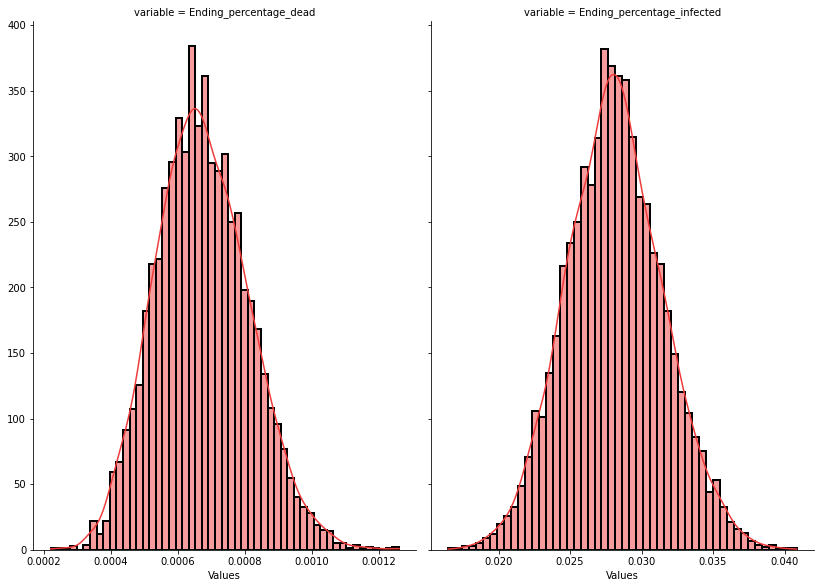

In [12]:
# Método que genera las gráficas en las cuales se puede ver el comportamiento de las variables simuladas.
# El usuario puedo hacer uso de atributos que puedan mejorar el aspecto visual de estas.
s1.histogram(kde=True, color='#EE3B3B',lw=2)

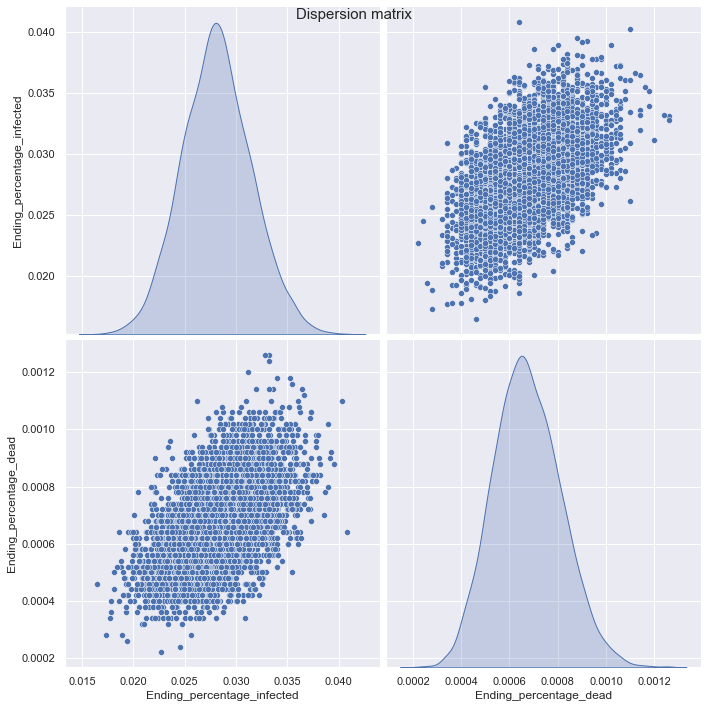

In [13]:
# Método que permite graficar la dispersión de las variables simuladas.
s1.plot_matrix(plot_type='pairplot',columns=False,method='pearson')

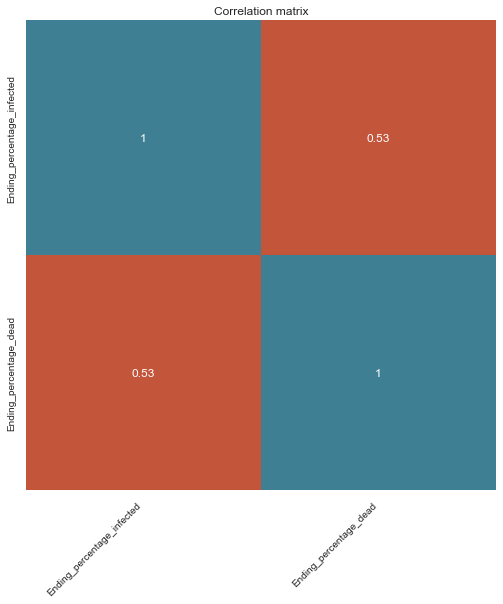

In [14]:
# Método que permite graficar la correlación de las variables simuladas mediante los diferentes métodos de cálculo de esta.
s1.plot_matrix(plot_type='corr_plot',columns=False,method='pearson')